# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("../data/LinearRegressionData.csv")
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [3]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립 변수, 원인)
y = dataset.iloc[:, -1] # 마지막 컬럼 데이터 (종속 변수, 결과)

In [4]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 0      10
 1       8
 2      14
 3      26
 4      22
 5      30
 6      42
 7      48
 8      38
 9      58
 10     60
 11     72
 12     62
 13     68
 14     72
 15     58
 16     76
 17     86
 18     90
 19    100
 Name: score, dtype: int64)

In [5]:
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습 (모델 생성)

LinearRegression()

In [6]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

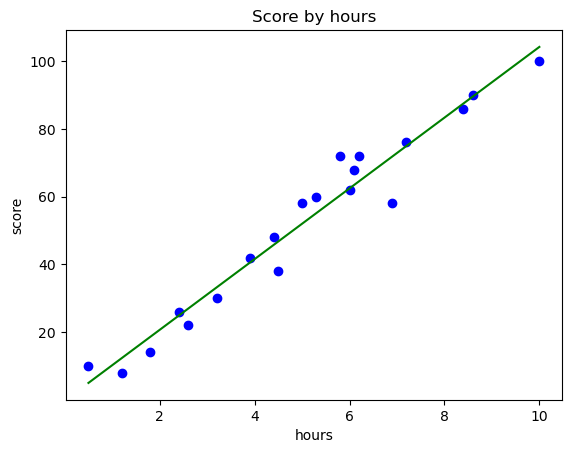

In [7]:
plt.title("Score by hours") # 제목
plt.scatter(X, y, color = "blue") # 산점도
plt.plot(X, y_pred, color = "green") # 선 그래프
plt.xlabel("hours") # x축 이름
plt.ylabel("score") # y축 이름
plt.show()

In [8]:
print("9시간 공부했을 때 예상 점수 : ", reg.predict([[9]])) # [[9], [8], [7]]

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [9]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [10]:
reg.intercept_ # y 절편 (b)

-0.21848470286721522

In [11]:
# y = mx + b -> y = 10.4437x - 0.2185

### 데이터 세트 분리

In [12]:
dataset = pd.read_csv("../data/LinearRegressionData.csv")
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [13]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립 변수, 원인)
y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터 (종속 변수, 결과)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # train 80 : test 20 으로 분리

In [15]:
len(X), X # 갯수, 전체 데이터 X

(20,
 array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]))

In [16]:
len(X_train), X_train # 갯수, 훈련 세트 X

(16,
 array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]))

In [17]:
len(X_test), X_test # 갯수, 테스트 세트 X

(4,
 array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]))

In [18]:
len(y), y # 전체 데이터 y

(20,
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [19]:
len(y_train), y_train # 갯수, 훈련 세트 y

(16,
 array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64))

In [20]:
len(y_test), y_test # 갯수, 테스트 세트 y

(4, array([ 90,   8, 100,  38], dtype=int64))

### 분리된 데이터를 통한 모델링

In [21]:
reg = LinearRegression()
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

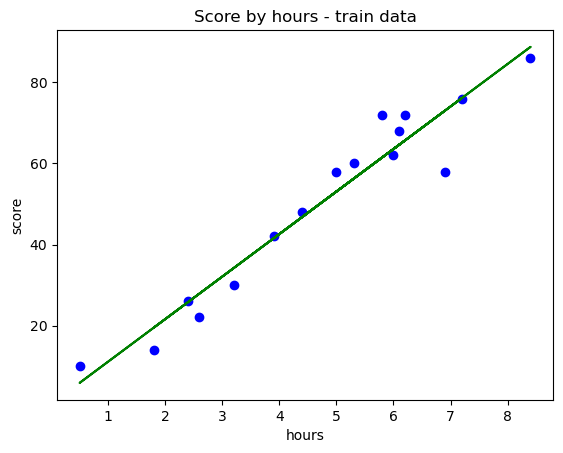

In [22]:
plt.title("Score by hours - train data") # 제목
plt.scatter(X_train, y_train, color = "blue") # 산점도
plt.plot(X_train, reg.predict(X_train), color = "green") # 선 그래프
plt.xlabel("hours") # x축 이름
plt.ylabel("score") # y축 이름
plt.show()

### 데이터 시각화 (테스트 세트)

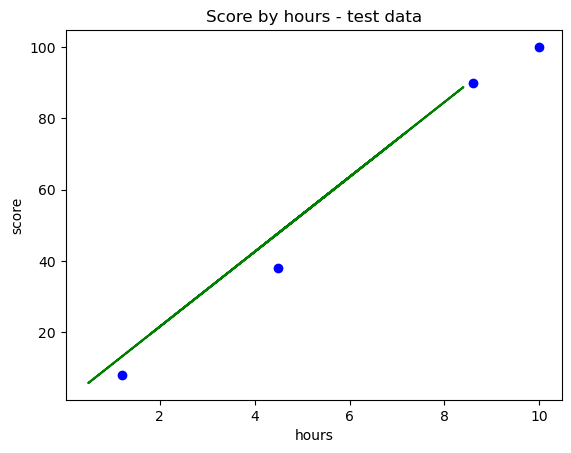

In [23]:
plt.title("Score by hours - test data") # 제목
plt.scatter(X_test, y_test, color = "blue") # 산점도
plt.plot(X_train, reg.predict(X_train), color = "green") # 선 그래프
plt.xlabel("hours") # x축 이름
plt.ylabel("score") # y축 이름
plt.show()

In [24]:
reg.coef_ # 기울기, 계수

array([10.49161294])

In [25]:
reg.intercept_ # 절편

0.6115562905169796

### 모델 평가

In [26]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [27]:
reg.score(X_train, y_train) #훈련 세트를 통한 모델 평가

0.9356663661221668

# 2. Gradient Descent

In [28]:
# SGDRegressor : Stochastic Gradient Descent, 확률적 경사 하강법
from sklearn.linear_model import SGDRegressor

In [29]:
'''
max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)
eta0 : 학습률 (learning rate)
verbose : 수행 시 출력되는 정보 설정 (0 : 출력 하지 않음, 1 : 자세히 출력, 2 : 간략히 출력)

지수 표기 법
1e-3 = 0.001 = 10^-3
1e-4 = 0.0001 = 10^-4
1e+3 = 1000 = 10^3
1e+4 = 10000 = 10^4
'''
# sr = SGDRegressor(max_iter = 200, eta0 = 1e-4, random_state = 0, verbose = 1)
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

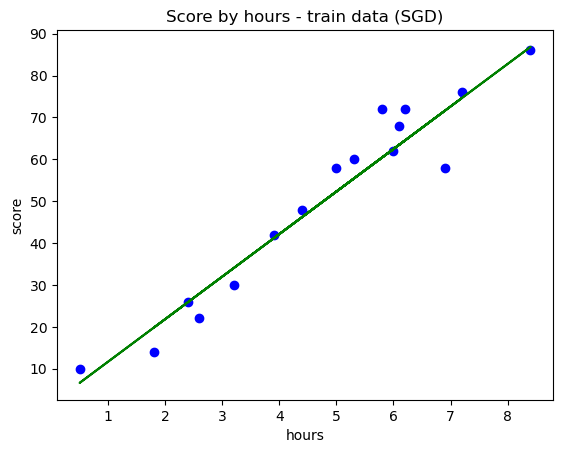

In [30]:
plt.title("Score by hours - train data (SGD)") # 제목
plt.scatter(X_train, y_train, color = "blue") # 산점도
plt.plot(X_train, sr.predict(X_train), color = "green") # 선 그래프
plt.xlabel("hours") # x축 이름
plt.ylabel("score") # y축 이름
plt.show()
# max_iter를 높일 수록 기울기가 가파르게 올라감

In [31]:
sr.coef_, sr.intercept_

(array([10.15825981]), array([1.51492043]))

In [32]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9773852233375471

In [33]:
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9338527222941049